<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2022</h1>
<h2>Pràctica 4 - Programació dinàmica</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.ndimage as nd
from tqdm.notebook import trange

%matplotlib inline

## Introducció a la llibreria _numpy_. Llistes vs arrays

In [3]:
# Els tractem igual tot i que són dos tipus de dades diferents
a = [1,2,3,4]
b = np.array([1,2,3,4])

print(a, type(a))
print(b, type(b))

[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>


In [4]:
# La suma de llistes i la suma d'arrays es comporta diferent
a1, a2 = [1,2,3,4], [5,6,7,8]
b1, b2 = np.array([1,2,3,4]), np.array([5,6,7,8])

print(a1+a2)
print(b1+b2)

[1, 2, 3, 4, 5, 6, 7, 8]
[ 6  8 10 12]


In [5]:
# Accedim a la dimensió d'una matriu de tamany 2x3. Observeu que la primera component és l'alçada i la segona l'amplada.
a = [[1,2,3], [4,5,6]]
b = np.array([[1,2,3],[4,5,6]])

print(len(a), len(a[0]))
print(b.shape)

2 3
(2, 3)


In [6]:
# Indexem igual per accedir a les files
print(a[0])
print(b[0])
print()
# En numpy podem seleccionar un element usant b[i,j] de la mateixa forma que podem fer b[i][j]
print(a[0][1])
print(b[0][1], b[0,1])

[1, 2, 3]
[1 2 3]

2
2 2


In [7]:
# Podem definir el 'tipus' de dada que volem fer servir
b1 = np.array([1,2,3,4], dtype=int)
b2 = np.array([1,2,3,4], dtype=float)

print(b1)
print(b2)

[1 2 3 4]
[1. 2. 3. 4.]


## Conceptes bàsics imatges

Una imatge en color, RGB, no és més que una matriu tridimensional $W\times H\times 3$ on $W$ és l'amplada, $H$ és l'alçada i 3 són els canals R (Red), G (Green), B (Blue).

<img src="./img/rgb.png" width=50%>

Shape: (32, 32, 3)


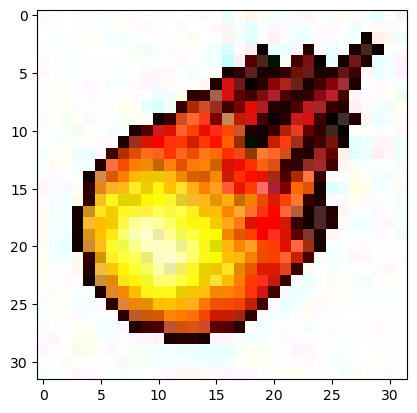

In [8]:
# Carreguem una imatge petita
# Generalment les imatges tenen valors de 0 a 255. Nosaltres treballarem en el rang 0 a 1 i per això dividim tots els valors per 255.
im = plt.imread('img/fireball.jpg')/255

# Així podem observar la seva mida.
print("Shape:",im.shape)

# Podem visualitzar-la utilitzant la funció 'imshow' de la llibreria matplotlib.pyplot
plt.imshow(im)
plt.show()

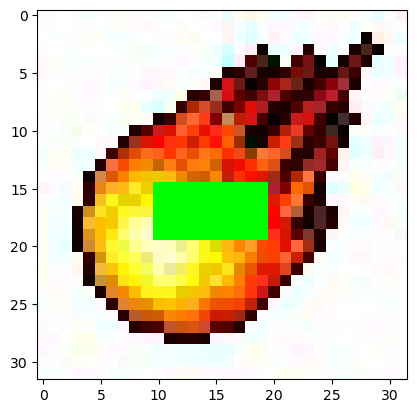

In [9]:
# Podem modificar-la utilitzant slicing
# Observeu que li assignem el color verd ja que [0, 1, 0] = [R, G, B] = [Red, Green, Blue]
im[15:20, 10:20] = [0,1,0]
plt.imshow(im)
plt.show()

(32, 32, 3)


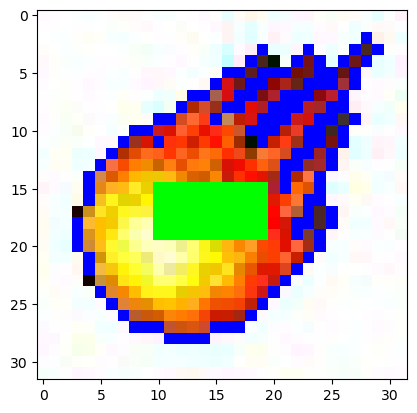

In [10]:
# També podem modificar-la usant una condició sobre els seus píxels
# Tots els píxels tals que la seva component verda (2a component, índex 1) sigui igual a zero,
# la transformem en color blau (0,0,1).
# Com podeu veure el color negre pur és [0,0,0] i, com que té la segona component blava a zero, 
# queda transformat en blau.

im[im[:,:,1] == 0] = [0,0,1]
print(im.shape)

plt.imshow(im)
plt.show()

<div class="alert alert-success">
    <h1>Problema 1: Implementació de l'algorisme Seam Carving</h1>
    <p>
        L'algorisme Seam Carving ens permet reduir la mida de les imatges en una de les seves dues dimensions (horitzontalment, per exemple) a través d'un algorisme senzill de programació dinàmica. Ens permet fer la següent reducció:
    </p>    
    <img src='img/seamcarving.jpg' width='80%'><br>
    <b>Sembla màgia, no?</b><br><br>
    S'agafa la imatge original i se'n calcula el gradient. A continuació es generen tots els camins a través de la programació dinàmica, es troba un camí mínim i s'elimina. Es repeteix aquest procediment fins a obtenir el resultat desitjat. Observa'n un altre exemple:
    <img src='img/seamcarving_alg.png' width='80%'><br>
    En aquest cas hem reduit la imatge original en 150 píxels, horitzontalment. Com veieu, la major part dels objectes es conserven ja que s'han eliminat zones 'suaus' com el cel i la sorra.
    <br><br>
    <h3>Implementació</h3>
    <ol>
        <li> Implementeu una funció <code>superior_neighbors</code> que retorni els veïns superiors d'un punt d'una imatge 2-D. A la capçalera de la funció trobareu els tres casos que cal tenir en compte
        <li> Implementeu una funció <code>minimal_paths</code> que, usant el següent algorisme de programació dinàmica, construeixi la matriu de camins, $D$. Aquesta funció ha d'usar la funció <code>superior_neighbors</code> per obtenir els veïns.<br>
            Sigui $G$ la imatge de gradient i sigui $D$ la matriu de camins mínims que hem d'omplir, ambdues de dimensió $H \times W$ :
            $$D_{i,j} = \begin{cases}
                            G_{i,j}+\min\Big(D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{if} \ j=0\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j}\Big) \quad \text{if} \ j=W-1\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{else}                                      
                        \end{cases}$$
        <li> Implementeu una funció <code>find_min_path</code> que retorni el camí mínim sobre la imatge anterior, $D$. Per trobar-lo, l'algorisme ha de començar per la part inferior de la imatge i anar pujant fins a arribar a la part superior.
        <li> Implementeu una funció <code>delete_path</code> que elimini el camí mínim retornat per la funció anterior de la imatge original.
        <li> Implementeu una funció <code>reduce_image</code> que repeteixi tot el procés anterior un nombre finit de vegades, $N$.
    </ol>
</div>

Funcions auxiliars:

In [11]:
def get_gradient(im):
    """
    Donada una imatge, en calcula el gradient
    
    Params
    ======
    :im: Imatge de la que en volem calcular el gradient
    
    Returns
    =======
    :gradient: Gradient horitzontal de la imatge
    
    """
    
    # Transformem la imatge a un sol canal (blanc i negre)
    im_blackwhite = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    
    # Calculem el gradient usant sobel
    gradient = np.abs(nd.sobel(im_blackwhite))
    return gradient


def show_row(im_and_titles):
    """
    Donat un conjunt d'imatges i els seus títols, els mostra en una sola línia
    
    Params
    ======
    :im_and_titles: Llista de tuples en el format [(im, title), ...]    
    """
    
    # Creem una figura d'una sola línia
    fig, axs = plt.subplots(1,len(im_and_titles),figsize=(len(im_and_titles)*8,5))
    
    # Iterem el conjunt d'imatges i mostrem la imatge amb el seu títol
    for i, (im, title) in enumerate(im_and_titles):
        axs[i].imshow(im)
        axs[i].set_title(title)
        axs[i].set_axis_off()

    plt.tight_layout()
    plt.show()
    
    
def add_min_path(im, path, color=[1,0,0]):
    """
    Donada una imatge i un camí, afegeix el camí en un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: Imatge sense el camí
    :path: Camí que volem afegir
    :color: Color del camí
    
    Returns
    =======
    :im: Imatge amb el camí afegit
    """
    for i, j in path:
        im[i][j]=color
    return im

Exemple d'ús:

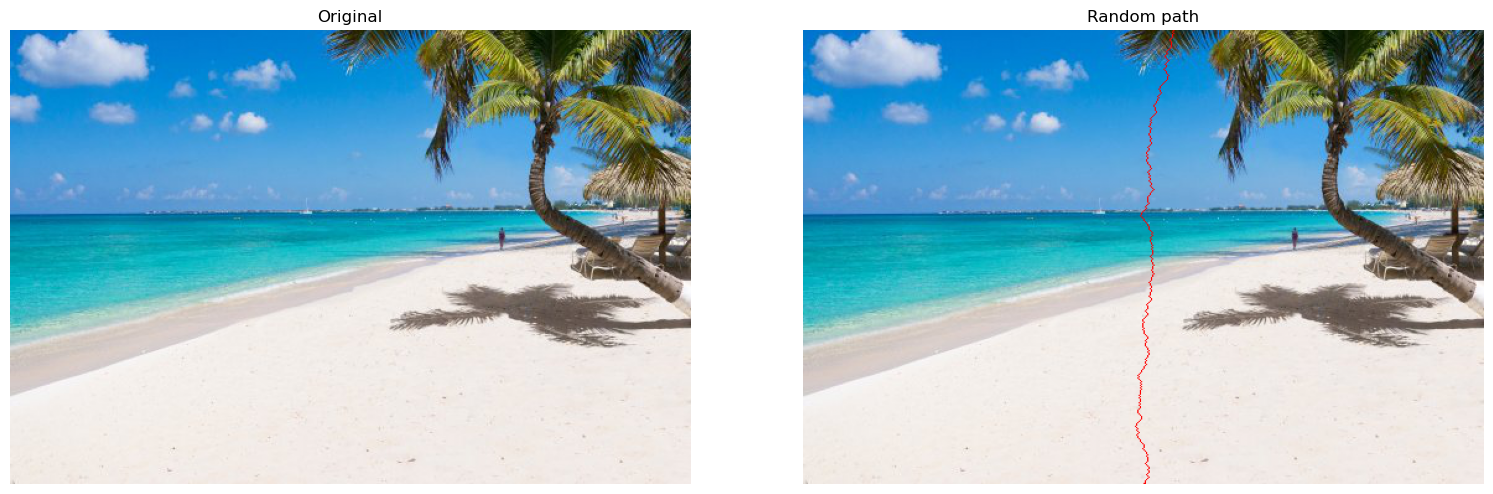

In [12]:
# Carreguem una imatge
im = plt.imread('img/beach.jpg')/255

# Creem un camí aleatori
i = im.shape[0]-1
path = [(i, im.shape[1]//2)]
while i >= 0:
    path.append((i, min(max(0, path[-1][1] + random.randint(-1,1)),im.shape[1]-1)))
    i-=1

# Afegim el camí a una imatge diferent
im_path = im.copy()
im_path = add_min_path(im_path, path)

# Usem la funció show_row per mostrar les imatges amb els seus títols.
im_titles = [(im, 'Original'), (im_path, 'Random path')]
show_row(im_titles)

## Gradient horitzontal

El <b>gradient horitzontal</b> d'una imatge ens permet trobar els punts de màxim canvi <b>vertical</b> en una imatge. Dit d'una altra forma, ens ressalta els contorns verticals.<br><br>
Observeu com podem usar la funció <code>get_gradient()</code> que us donem implementada:

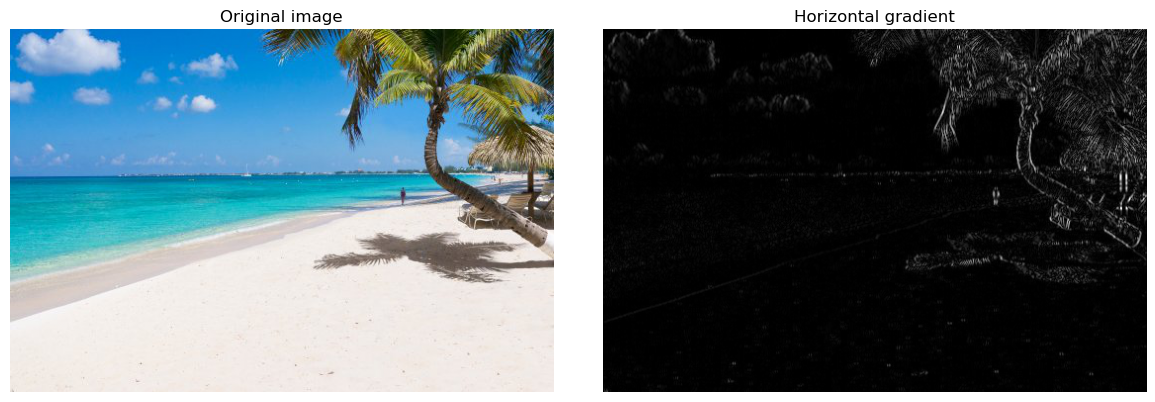

In [13]:
im = plt.imread('img/beach.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Mostrem la imatge
axs[0].imshow(im)
axs[0].set_title('Original image')
axs[0].set_axis_off()

# Mostrem el gradient horitzontal de la imatge
gradient = get_gradient(im)
axs[1].imshow(gradient, cmap='gray')
axs[1].set_title('Horizontal gradient')
axs[1].set_axis_off()

plt.tight_layout()
plt.show()

In [14]:
def superior_neighbors(mat, point):
    if (point[1] == 0):             # si la columna és la de l'extrem esquerra, agafem el veï d'adalt i el d'adalt a la dreta i els col·loquem a la llista que retornarem
        neighbors = np.array([mat[point[0]-1][point[1]], mat[point[0]-1][point[1]+1]])            
    elif (point[1] == mat.shape[1]-1):    # si la columna és la de l'extrem dret, agafem el veï d'adalt i el d'adalt esquerra i els col·loquem a la llista que retornarem     
        neighbors = np.array([mat[point[0]-1][point[1]-1],mat[point[0]-1][point[1]]])                 
    else:                # si la columna no és un extrem, agafem el veï d'adalt, el d'adalt esquerra i el d'adalt a la dreta i  els col·loquem a la llista que retornarem
        neighbors = np.array([mat[point[0]-1][point[1]-1], mat[point[0]-1][point[1]], mat[point[0]-1][point[1]+1]])
    return neighbors


def minimal_paths(mat):    
    ret = mat.copy()
    x, y = mat.shape                                           # agafem les mesures de la matriu mat (x=files, y=columnes)
    for i in range (1, x): 
        for j in range (0, y): 
            if (j == 0):                                       # si la columna és la de l'extrem esquerra, agafem el veï d'adalt i el d'adalt a la dreta 
                ret[i][j] += min(ret[i-1][j], ret[i-1][j+1])
            elif (j == y-1):                                   # si la columna és la de l'extrem dret, agafem el veï d'adalt i el d'adalt esquerra 
                ret[i][j] += min(ret[i-1][j-1], ret[i-1][j])
            else:
                ret[i][j] += min(ret[i-1][j-1], ret[i-1][j], ret[i-1][j+1]) # si la columna no és un extrem, agafem el veï d'adalt, el d'adalt esquerra i el d'adalt a la dreta  
    return ret

def minimal_value(arr):           # funció auxiliar per trobar la localització del valor mínim d'una array
    
    pos = 0                       # inicialitzem la posició on es troba el valor mínim
    min = arr[0]                  # inicialitzem el valor minim
    for i in range(1, len(arr)):  # recorrem l'array
        if (arr[i] < min):        # si el valor d'on ens trobem actualment en l'array és menor al mínim valor que teniem
            min = arr[i]          # actualitzem el valor mínim
            pos = i               # i actualitzem la posició on es troba el valor mínim
    return pos

def find_min_path(mat):
    """
    Donada una matriu, calcula el camí mínim sobre aquesta. L'algorisme ha de començar per la part inferior i buscar el següents punts.
    
    Params
    ======
    :mat: Matriu de camins mínims
    
    Returns
    =======
    :min_path: Una llista de tuples amb les coordenades (i,j) del camí mínim. La primera coordenada ha d'anar decrementant sempre en 1.
               Exemple. Suposant que una imatge té d'alçada 341 píxels, un possible camí seria: [(340, 120), (339, 121), (338,120), ..., (0, 151)] 
    """
    
    
    dimensio = mat.shape                              # agafem les mesures de la matriu mat (x=files, y=columnes)
    x = mat.shape[0]
    y = mat.shape[1]
    pixelx = x-1
    pixely = minimal_value(mat[x-1])                  # funció auxiliar minimal_value que obté la posició on es troba el valor mínim en una array 
    min_path = []                                     # creem una llista que contindrà el camí mínim 
    #min_path = [(0,0)]
    min_path.append((pixelx, pixely))                 # inicialitzem el path amb el pixel de menor valor de l'última fila 
    
    while (pixelx != 0):              
        aux = superior_neighbors(mat,(pixelx, pixely))# busquem els superiors neighbours del nostre punt i guardemla llista resultant en una variable auxiliar aux
        
        if (len(aux) == 2):                           # si la llista té 2 valors, és a dir, si es troba en un extrem
            if (aux[0] < aux[1]):                     # si el primer valor és més petit que el segon
                if (pixely == y-1):                   # i actualment ens trobem a l'extrem dret
                    pixely -= 1                       # restem 1 a pixely (que conté la posició)
            elif (aux[1] < aux[0]):                   # si el segon valor és més petit que el primer
                if (pixely == 0):                     # i actualment ens trobem a l'extrem esquerra
                    pixely += 1                       # sumem 1 a pixely
        elif (aux[0] < aux[1]) and (aux[0] < aux[2]): #si el de l'esquerra del tot és el més petit restem 1 a pixely
            pixely -= 1                               #si el del mig és el més petit pixely es manté igual
        elif (aux[2] < aux[0]) and (aux[2] < aux[1]): #si el de la dreta és el més petit sumem 1 a pixely
            pixely += 1                               
        pixelx -= 1                                   #restem 1 a pixelx perquè ens movem a la fila d'adalt
        
        min_path.append((pixelx, pixely))             #afegim el pixel al path 
   
    return min_path





def delete_path(im, path):
    """
    Donat una imatge i un camí, elimina els pixels de la imatge que pertanyen del camí.
    Podeu usar la següent instrucció per inicialitzar la imatge. Això crea una imatge amb tots els valors a zero.
    
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2]))
    
    Params
    ======
    :im: Una imatge de mida H x W x 3
    :path: Un camí sobre la imatge. 
    
    Returns
    =======
    :im_new: Una nova imatge de mida H x (W-1) x 3 amb el camí eliminat
    """
    
    # EL TEU CODI AQUÍ
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2])) # creem una matriu de zeros
    for i, j in path:                                   # recorrem el camí començant des d'abaix
        if j==0:                                        # si el primer pixel del camí a eliminar es troba a la columna de l'extrem esquerra de la imatge
            mat = im[i, j+1:im.shape[1]]                # creem una array auxiliar que en aquest cas, guardarà tots els valors de la mateixa fila 
                                                        # que la de la imatge, excepte el primer valor
            im_new[i] = mat                             # inserim l'array creada anteriorment en la fila i de la nova imatge
            
        elif j == im.shape[1]:                          # si el primer pixel del camí a eliminar es troba a la columna de l'extrem dret de la imatge
            mat = im[i, 0:im.shape[1]-1]                # creem una array auxiliar que en aquest cas, guardarà tots els valors de la mateixa fila 
                                                        # que la de la imatge, excepte l'últim valor
            im_new[i] = mat                             # inserim l'array creada anteriorment en la fila i de la nova imatge
            
        else:                                           # si el primer pixel del camí a eliminar es troba en qualsevol columna ( que no sigui dels extrems) 
            mat = im[i, 0:j]                            # creem una array auxiliar que en aquest cas, guardarà tots els valors de la mateixa fila 
                                                        # que la de la imatge, des de la primera columna fins a la columna on es troba el pixel a eliminar(sense inclou-re'l)
            mat2 = im[i, j+1: im.shape[1]]              # creem una altra array auxiliar que en aquest cas, guardarà tots els valors de la mateixa fila 
                                                        # que la de la imatge, des de columna on es troba el pixel a eliminar(sense inclou-re'l) fins al final
            im_new[i] = list(mat) + list(mat2)          # inserim les arrays creades anteriorment en la fila i de la nova imatge
        
    return im_new


def reduce_image(im, N=100):    
    """
    Implementació de l'algorisme Seam Carving. 
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Primer camí que s'elimina
        - Imatge resultant després de N iteracions
    
    Params
    ======
    :im: Imatge que volem reduir
    :N: Nombre de cops que repetirem l'algorisme
    """
    
    # EL TEU CODI AQUÍ
    for i in range(N):
        g = get_gradient(im)                         # 1r  calculem els gradients
        ret = minimal_paths(g)                       # 2n  creem els camins mínims de manera dinàmica
        path = find_min_path(ret)                    # 3r  buscar el camí mínim
        im = delete_path(im,path)                    # 4t  eliminar el camí mínim
                                                     # 5é  repetir el procés N vegades




    plt.imshow(im)
    plt.show()

Comproveu la vostra solució

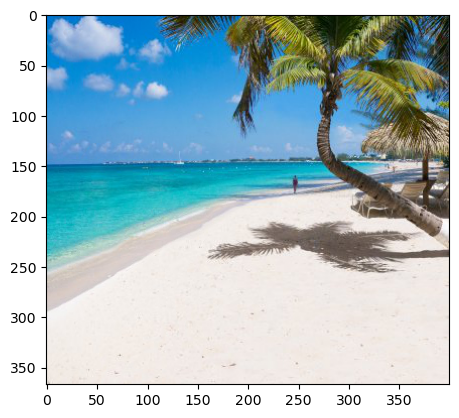

In [15]:
im = plt.imread('img/beach.jpg')/255
reduce_image(im, 150)

<div class="alert alert-success">
    <h1>Problema 2: Eliminar objectes d'una imatge</h1>
    <p>Modifiqueu l'algorisme anterior per a eliminar objectes d'una imatge. Només heu d'implementar la funció <code>remove_patch</code>. <br>Per exemple:</p>
    <img src='img/im_patched.png' width='80%'><br>
    <b>Pista:</b> Ens hem d'assegurar que els camins mínims sempre passin per l'interior del patch.
</div>

In [31]:
def add_patch(im, patch):
    """
    Donada una imatge i un patch. Mostra la imatge amb el patch d'un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: La imatge a la que volem afegit el patch
    :patch: Patch amb quatre coordenades. Format: [(i1,j1), (i2, j2)]
    
    Returns
    =======
    :im: Imatge amb els píxels del patch en vermell.
    """
    
    for i in range(patch[0][0], patch[1][0]+1):
        for j in range(patch[0][1], patch[1][1]+1):
            im[i][j] = [1,0,0]
    return im

def remove_patch(im, patch):
    """
    Donada una imatge i un patch, n'elimina tots els punts interiors al patch.
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Imatge amb el patch de color vermell
        - Imatge resultant després d'eliminar el patch
    
    Params
    ======
    :im: Imatge original
    :patch: Patch amb dos parells de coordenades. 
            Format: [(i1,j1), (i2, j2)]. Sempre se satisfà que i1<i2, j1<j2.
            (i1, j1) és la coordenada superior esquerra del patch
            (i2, j2) és la coordenada inferior dreta del patch.
            Aquestes dues parelles s'han d'incloure com a part del patch.
    """
    
    # EL TEU CODI AQUÍ
    imO = im.copy() #còpia de la imatge original per a mostrar al resultat
    im = add_patch(im,patch) # im conté la imatge amb el patch
    im_patch = im.copy() #còpia de la imatge amb el patch per a mostrar al resultat
    
    for i in range(patch[1][1]-patch[0][1]+1):
        gradient = get_gradient(im)
        for x in range(patch[0][0], patch[1][0]+1):
            gradient[x][patch[0][1]] = -10
        ret = minimal_paths(gradient)
        min_path = find_min_path(ret)
        im = delete_path(im, min_path)
    im_titles = [(imO,"Imatge original"),(im_patch,"Imatge amb el patch"),(im,"Imatge resultant")]
    show_row(im_titles)


Comproveu la vostra solució.

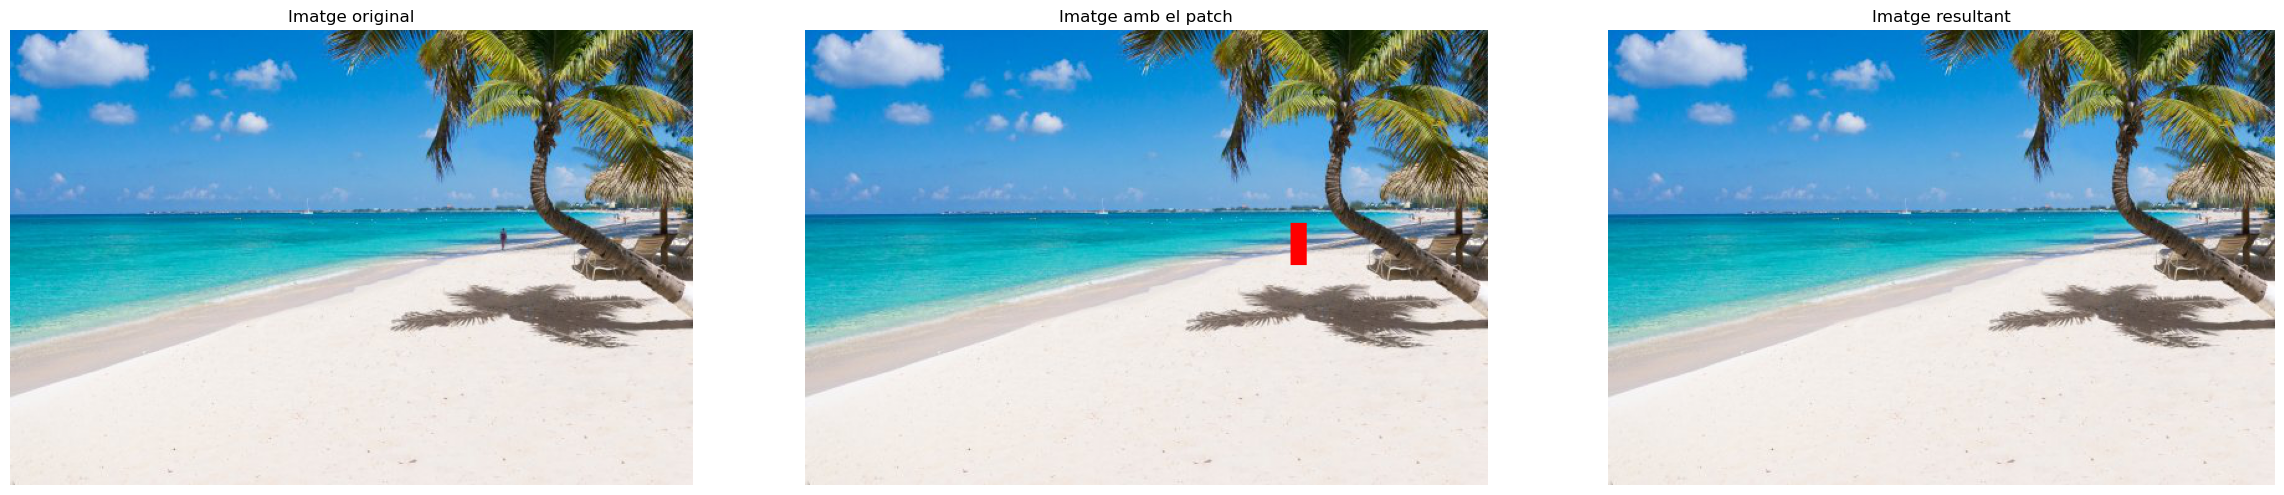

In [32]:
im = plt.imread('img/beach.jpg')/255
patch = [(156,391), (189,403)]

remove_patch(im, patch)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>4 de Desembre a les 23:59</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b>. El notebook ha de tenir com a nom:
</p>
<p>
    <code>Grup_Cognom_Nom_DP.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>